## 데이터 분석

### 척도 결정 : 상관 분석과 결정 계수를 사용하여 분석

**death.csv file 불러오기**

death.csv file 불러온 후 누가, 언제 사망했는지를 알기 위해 `person_id`, `death_date` column을 가져온다.

In [1]:
import pandas as pd

death_df = pd.read_csv('synthea_cdm_csv/death.csv')
death_df = death_df[['person_id', 'death_date']]
death_df

,person_id,death_date
0,1691806,2015-06-02
1,99181,2018-11-04
2,2738610,1998-03-28
3,31196,2020-03-16
4,994339,2006-03-08
...,...,...
147,359466,1937-10-22
148,1891866,1998-10-11
149,533445,2003-08-06
150,2399178,2020-02-05


`death` Tbl에 있는 `person`은 모두 사망 한 사람이므로 이를 표시 해 주기 위해 `death` column에 raw는 1이란 값으로 모두 사망 한 사람이라는 것을 표기

In [2]:
death_df['death']=1
death_df

,person_id,death_date,death
0,1691806,2015-06-02,1
1,99181,2018-11-04,1
2,2738610,1998-03-28,1
3,31196,2020-03-16,1
4,994339,2006-03-08,1
...,...,...,...
147,359466,1937-10-22,1
148,1891866,1998-10-11,1
149,533445,2003-08-06,1
150,2399178,2020-02-05,1


**person.csv file 불러오기**

`person` Tbl의 column 중 문제에서 제시 된 column을 가져와 `person_df` 변수에 할당.
각 사람의 나이를 계산하기 위한 로직 추가. (나이에 따른 사망률 상관 관계를 알기 위해)

In [37]:
person_dff = pd.read_csv('synthea_cdm_csv/person.csv')
person_df = person_dff[['person_id', 'gender_concept_id', 'ethnicity_concept_id', 'year_of_birth']]
person_df['year_of_birth'] = 2020-person_df['year_of_birth']
person_df

<ipython-input-37-98e11dcef09d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df['year_of_birth'] = 2020-person_df['year_of_birth']


,person_id,gender_concept_id,ethnicity_concept_id,year_of_birth
0,402435,8532,0,23
1,1022983,8507,0,70
2,1657794,8532,0,83
3,2845932,8507,0,33
4,2693038,8532,0,61
...,...,...,...,...
995,680801,8532,0,14
996,1258670,8532,0,50
997,1209983,8532,0,22
998,2565313,8532,0,55


In [36]:
person_dff

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,402435,8532,1997,4,18,1997-04-18 00:00:00,8527,0,NaN,NaN,NaN,a434e3bf-7720-4612-8d18-e274e199f4fd,F,0,white,0,hispanic,0
1,1022983,8507,1950,2,26,1950-02-26 00:00:00,8527,0,NaN,NaN,NaN,e0b46681-1ccf-488e-9766-bbdb1fe53af2,M,0,white,0,hispanic,0
2,1657794,8532,1937,12,10,1937-12-10 00:00:00,8527,0,NaN,NaN,NaN,f6d7bf9f-0881-4142-9dfa-67fa213dd322,F,0,white,0,hispanic,0
3,2845932,8507,1987,5,26,1987-05-26 00:00:00,8515,0,NaN,NaN,NaN,1387a5c0-159c-4dd2-9ef8-4e7f47a6d288,M,0,asian,0,hispanic,0
4,2693038,8532,1959,2,7,1959-02-07 00:00:00,8527,0,NaN,NaN,NaN,8dea9575-d5cc-4a50-ab5e-a8c0de735fcf,F,0,white,0,nonhispanic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,680801,8532,2006,11,2,2006-11-02 00:00:00,8527,0,NaN,NaN,NaN,6d151069-d3f3-4e6b-8ff5-3e0b07eba303,F,0,white,0,nonhispanic,0
996,1258670,8532,1970,12,27,1970-12-27 00:00:00,8527,0,NaN,NaN,NaN,ac9d59aa-73ba-4ba8-b440-69ec2e6c2393,F,0,white,0,hispanic,0
997,1209983,8532,1998,7,10,1998-07-10 00:00:00,8527,0,NaN,NaN,NaN,075feb8e-e62e-4158-839e-ec5d0ea7d3e6,F,0,white,0,nonhispanic,0
998,2565313,8532,1965,5,14,1965-05-14 00:00:00,8527,0,NaN,NaN,NaN,351bd79b-1e6f-421a-9bd2-3f38690c4342,F,0,white,0,nonhispanic,0


`person_df`에 `gender_concept_id` column은 어떤 값으로 이루어져있는가 확인

In [35]:
person_df['gender_concept_id'].unique()

array([8532, 8507])

`death_df` Tbl과 `person_df` Tbl을 `person_id`를 기준으로 `outer join`
`death` column에 `Nan` 값을 0으로 변환해줌

In [38]:
person_df2 = pd.merge(death_df, person_df, left_on='person_id', right_on='person_id', how='outer')
person_df2['death'] = person_df2['death'].fillna(0)
person_df2['death']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: death, Length: 1000, dtype: float64

**visit_occurrence.csv file 불러오기**

- 내원일수를 구하기 위해 `visit_end_date` - `visit_start_date` 연산을 수행

- `visit_df` DataFrame에서 `person_id`, `visit_concept_id`, `내원일수`를 불러옴

- 내원일수를 정렬

In [48]:
visit_df = pd.read_csv('synthea_cdm_csv/visit_occurrence.csv')
visit_df["visit_start_date"] = visit_df["visit_start_date"].astype('datetime64[ns]').dt.date
visit_df["visit_end_date"] = visit_df["visit_end_date"].astype('datetime64[ns]').dt.date
visit_df['내원일수'] = visit_df['visit_end_date'] - visit_df['visit_start_date']
visit_df = visit_df[['person_id', 'visit_concept_id', '내원일수']]
visit_df.sort_values(by='내원일수', ascending=False)

,person_id,visit_concept_id,내원일수
18315,426322,9201,3730 days
27618,1059760,9201,713 days
27619,1059760,9201,704 days
27620,1059760,9201,695 days
27621,1059760,9201,694 days
...,...,...,...
14368,2797966,9202,0 days
14369,2797966,9202,0 days
14370,2797966,9202,0 days
14371,2797966,9202,0 days


**condition_occurrence.csv file 불러오기**

csv file 불러 온 후 사용 할 column (`person_id`, `condition_concept_id`, `condition_source_value`)을 분리

In [49]:
condition_df = pd.read_csv('synthea_cdm_csv/condition_occurrence.csv')
condition_df = condition_df[['person_id', 'condition_concept_id', 'condition_source_value']]
condition_df

,person_id,condition_concept_id,condition_source_value
0,116496,0,162864005
1,116496,0,840544004
2,116496,81151,44465007
3,116496,260139,10509002
4,116496,312437,267036007
...,...,...,...
12162,2781995,4112343,195662009
12163,2781995,4112343,195662009
12164,2781995,4147326,267102003
12165,2781995,37311061,840539006


**drug_exposure.csv file 불러오기**

csv file 불러 온 후 사용 할 column (`person_id`, `drug_concept_id`, `drug_source_value`)을 분리

In [50]:
drug_df = pd.read_csv('synthea_cdm_csv/drug_exposure.csv')
drug_df = drug_df[['person_id', 'drug_concept_id', 'drug_source_value']]
drug_df

,person_id,drug_concept_id,drug_source_value
0,26922,19073183,308182
1,2955,40231925,1049221
2,2955,40229134,1043400
3,2955,1115171,849574
4,2955,40213154,140
...,...,...,...
46574,2845932,40213154,140
46575,2845932,40213154,140
46576,2845932,40213154,140
46577,2845932,40213227,113


**visit_occurrence.csv file 불러오기**

In [51]:
concept_df = pd.read_csv('synthea_cdm_csv/concept.csv')
concept_df

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,0,No matching concept,Metadata,None,Undefined,NaN,No matching concept,1970-01-01,2099-12-31,NaN
1,1,Domain,Metadata,Domain,Domain,NaN,OMOP generated,1970-01-01,2099-12-31,NaN
2,2,Gender,Metadata,Domain,Domain,NaN,OMOP generated,1970-01-01,2099-12-31,NaN
3,3,Race,Metadata,Domain,Domain,NaN,OMOP generated,1970-01-01,2099-12-31,NaN
4,4,Ethnicity,Metadata,Domain,Domain,NaN,OMOP generated,1970-01-01,2099-12-31,NaN
...,...,...,...,...,...,...,...,...,...,...
7403687,600000008,OMOP Tricyclic Antidepressants,Drug,Cohort,Cohort,C,600000008,1970-01-01,2099-12-31,NaN
7403688,600000009,OMOP Typical Antipsychotics,Drug,Cohort,Cohort,C,600000009,1970-01-01,2099-12-31,NaN
7403689,600000010,OMOP Warfarin,Drug,Cohort,Cohort,C,600000010,1970-01-01,2099-12-31,NaN
7403690,600000011,OMOP Condition cohort era,Drug,Cohort,Cohort,C,600000011,1970-01-01,2099-12-31,NaN


위에서 미리 정의 해 둔 `death`와 `person`을 `merge`한 `person_df2` 와 `visit_df`를 `person_id`를 기준으로 `outer join`

In [52]:
total_df = pd.merge(person_df2, visit_df, left_on='person_id', right_on='person_id', how='outer')
total_df

,person_id,death_date,death,gender_concept_id,ethnicity_concept_id,year_of_birth,visit_concept_id,내원일수
0,1691806,2015-06-02,1.0,8532,0,87,9202,0 days
1,1691806,2015-06-02,1.0,8532,0,87,9202,0 days
2,1691806,2015-06-02,1.0,8532,0,87,9202,0 days
3,1691806,2015-06-02,1.0,8532,0,87,9202,0 days
4,1691806,2015-06-02,1.0,8532,0,87,9202,0 days
...,...,...,...,...,...,...,...,...
41805,277792,NaN,0.0,8507,0,66,9202,0 days
41806,277792,NaN,0.0,8507,0,66,9202,0 days
41807,277792,NaN,0.0,8507,0,66,9202,0 days
41808,277792,NaN,0.0,8507,0,66,9202,0 days


바로 위에서 정의 한 `total_df`와 `condition_df`를 `person_id`를 기준으로 `outer join`한 것을 다시 `total_df`에 할당

In [53]:
total_df = pd.merge(total_df, condition_df, left_on='person_id', right_on='person_id', how='outer')
total_df

,person_id,death_date,death,gender_concept_id,ethnicity_concept_id,year_of_birth,visit_concept_id,내원일수,condition_concept_id,condition_source_value
0,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,0.0,162864005.0
1,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,75036.0,201834006.0
2,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,199076.0,79586000.0
3,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,255848.0,233604007.0
4,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,257012.0,40055000.0
...,...,...,...,...,...,...,...,...,...,...
604874,277792,NaN,0.0,8507,0,66,9202,0 days,4166224.0,47693006.0
604875,277792,NaN,0.0,8507,0,66,9202,0 days,4311629.0,15777000.0
604876,277792,NaN,0.0,8507,0,66,9202,0 days,37311061.0,840539006.0
604877,277792,NaN,0.0,8507,0,66,9202,0 days,40481087.0,444814009.0


`total_df`와 `drug_df`를 `person_id`를 기준으로 `outer join`한 것을 다시 `total_df`에 할당

In [54]:
total_df = pd.merge(total_df, drug_df, left_on='person_id', right_on='person_id', how='outer')
total_df

,person_id,death_date,death,gender_concept_id,ethnicity_concept_id,year_of_birth,visit_concept_id,내원일수,condition_concept_id,condition_source_value,drug_concept_id,drug_source_value
0,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,0.0,162864005.0,1539463,314231
1,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,0.0,162864005.0,40224172,999967
2,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,0.0,162864005.0,40224172,999967
3,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,0.0,162864005.0,40224172,999967
4,1691806,2015-06-02,1.0,8532,0,87,9202,0 days,0.0,162864005.0,40224172,999967
...,...,...,...,...,...,...,...,...,...,...,...,...
154173614,277792,NaN,0.0,8507,0,66,9202,0 days,40481087.0,444814009.0,40213154,140
154173615,277792,NaN,0.0,8507,0,66,9202,0 days,40481087.0,444814009.0,40213154,140
154173616,277792,NaN,0.0,8507,0,66,9202,0 days,40481087.0,444814009.0,40213154,140
154173617,277792,NaN,0.0,8507,0,66,9202,0 days,40481087.0,444814009.0,40213154,140


`join` 한 `total_df`를 상관분석 한 결과를 시각화하기 위해 `heatmap` 사용

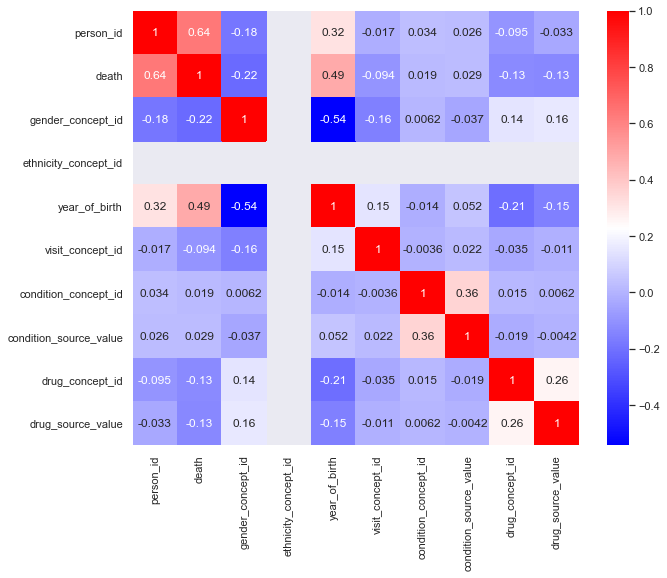

In [55]:

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

corr_mat = total_df.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

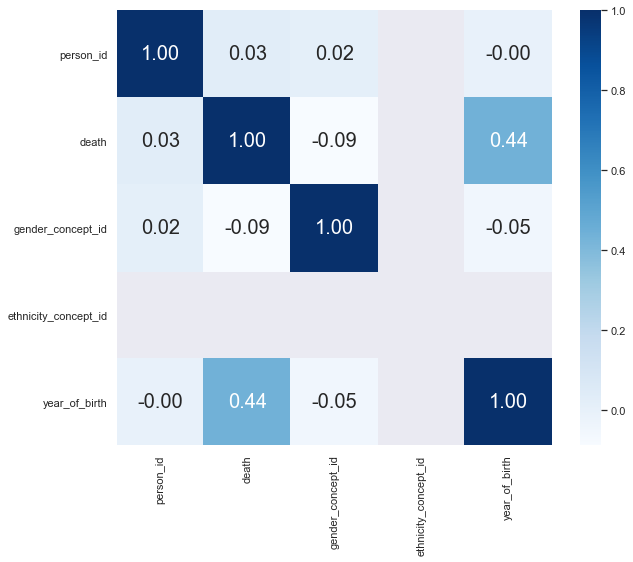

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

corr_mat = person_df2.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr_mat, cbar = True, annot = True, annot_kws={'size' : 20}, 
                         fmt = '.2f', square = True, cmap = 'Blues')

상관계수로 시각화 한 heatmap을 결정계수로도 시각화해줌

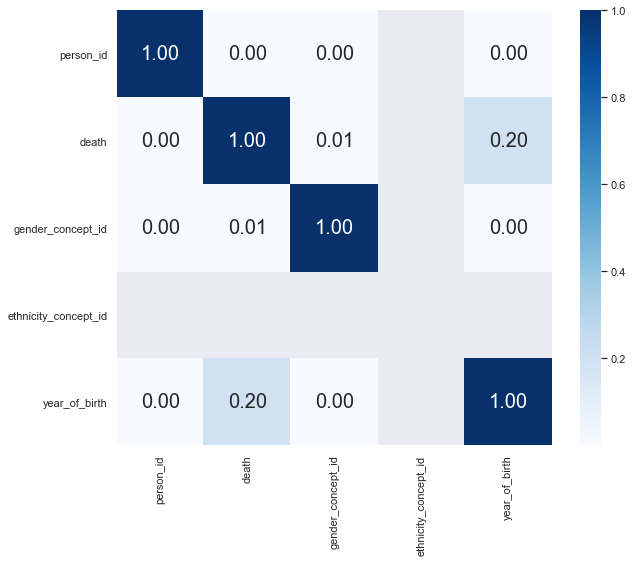

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

corr_mat = person_df2.corr()**2
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr_mat, cbar = True, annot = True, annot_kws={'size' : 20}, 
                         fmt = '.2f', square = True, cmap = 'Blues')